In [1]:
using StateSpaceDynamics

In [2]:
model = initialize_slds()

SwitchingLinearDynamicalSystem([0.5686413682169027 0.4313586317830972; 0.39042143546215796 0.6095785645378421], StateSpaceDynamics.LinearDynamicalSystem[StateSpaceDynamics.LinearDynamicalSystem{StateSpaceDynamics.GaussianStateModel{Float64}, StateSpaceDynamics.GaussianObservationModel{Float64}}(StateSpaceDynamics.GaussianStateModel{Float64}([0.9204668006251124 -0.2350337612917968; 0.2350337612917968 0.9204668006251124], [0.1 0.0; 0.0 0.1], [0.0, 0.0], [0.1 0.0; 0.0 0.1]), StateSpaceDynamics.GaussianObservationModel{Float64}([-0.8595553820616212 -1.6658075498442124; -1.4692882055065464 0.38163694535441856; … ; 0.517130881450359 1.1979596698125403; 1.4472238915818758 -1.2290887130815225], [0.5 0.0 … 0.0 0.0; 0.0 0.5 … 0.0 0.0; … ; 0.0 0.0 … 0.5 0.0; 0.0 0.0 … 0.0 0.5]), 2, 10, Bool[1, 1, 1, 1, 1, 1]), StateSpaceDynamics.LinearDynamicalSystem{StateSpaceDynamics.GaussianStateModel{Float64}, StateSpaceDynamics.GaussianObservationModel{Float64}}(StateSpaceDynamics.GaussianStateModel{Float64}

In [3]:
T = 100
# Generate synthetic data
_, y, x = sample(model, T)


([-0.011827244398846836 0.2788244678457647 … -0.5135485402627521 -0.7222594414897752; -0.22639925721218238 -0.6176799382452005 … -0.02911931950838531 -0.5959456259990294], [1.0441932962440357 1.0861809232869089 … -1.300954969059553 1.96928608983541; -0.8758466925784547 -0.26292180897649947 … 0.7554874898897548 1.257722417240287; … ; -1.3624159771569548 -1.3162247190750846 … 0.16772508831952265 -0.9174156153303139; -1.428861222928581 1.5586739277867219 … -0.3748529538780018 0.09887630441079143], [2, 2, 1, 1, 1, 2, 2, 2, 1, 2  …  2, 2, 2, 2, 1, 2, 2, 2, 2, 2])

In [4]:
using Plots

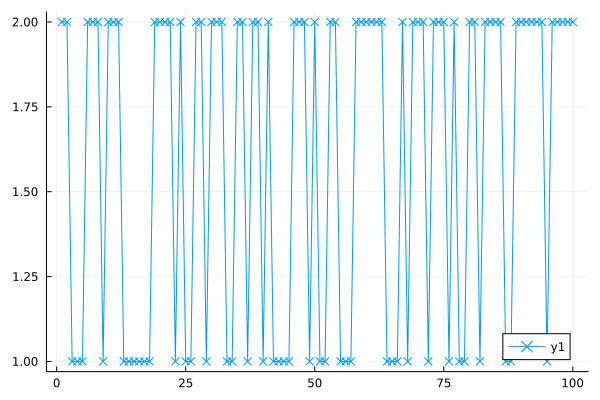

In [5]:
plot(x, marker=:x)

In [41]:
# smooth observations using the naive model
x_smooth, p_smooth, inverse_offdiag, total_entropy = smooth(model.B[1], y)

# calculate sufficient statistics
E_z, E_zz, E_zz_prev = StateSpaceDynamics.sufficient_statistics(reshape(x_smooth, size(x_smooth)..., 1), reshape(p_smooth, size(p_smooth)..., 1), reshape(inverse_offdiag, size(inverse_offdiag)..., 1))

([-0.18269664256955492 0.056238525308788256 … -0.2905685924702147 -0.6344428090759817; -0.2974189111596512 -0.7382982188587218 … 0.2859480284202403 -0.43557054322957944;;;], [0.05922592378300864 0.05356516423593052; 0.05356516423593052 0.11847559164576167;;; 0.030614522710309188 -0.04251980019245649; -0.04251980019245649 0.577500459672062;;; 0.241290156239365 -0.3211904596104687; -0.3211904596104687 0.5121759710497132;;; … ;;; 0.027906508047031098 0.005123462559922502; 0.005123462559922502 0.15285334785371513;;; 0.11236899186871543 -0.08416099133630889; -0.08416099133630889 0.11507933674409421;;; 0.43635050745215137 0.27470023437914853; 0.27470023437914853 0.23079798221433437;;;;], [0.0 0.0; 0.0 0.0;;; -0.004119351854563609 -0.01894572341822713; 0.1363096881450766 0.22788325682264185;;; 0.03254895297043864 -0.3437583907119743; -0.03748219018932984 0.5202340468097109;;; … ;;; 0.01328983257830742 -0.004067526024722975; 0.13225113378301634 -0.02233722706600503;;; 0.0015027692583693044 -0.

In [51]:
size(p_smooth)

(2, 2, 100)

In [38]:
tuple(hcat(size(p_smooth), 1))

(Any[(2, 2, 100) 1],)

In [7]:
plot(smoothed_x')

UndefVarError: UndefVarError: `smoothed_x` not defined

In [8]:
w = rand(T);

In [9]:
loglikelihood(smoothed_x, model.B[1], y, w)

-253.71799686233297

In [10]:
loglikelihood(smoothed_x, model.B[1], y)

-498.46103307205516

In [11]:
smooth(model.B[1], y, w)

([-0.1565016361403137 0.11270661051298168 … -0.3792068729582792 -0.6475664428947466; -0.410981388136503 -0.7866460848827623 … 0.14208489840364957 -0.4917625256840466], [0.09286661916492114 -0.002259748695996085; -0.002259748695996085 0.10591566888539601;;; 0.054041129321529636 -0.0017735770021970938; -0.0017735770021970938 0.06357633942911091;;; 0.03653857105074204 -0.0016859837784758047; -0.0016859837784758047 0.044148784727308946;;; … ;;; 0.074782271478958 -0.002626618374803943; -0.002626618374803943 0.08768663117611893;;; 0.07298850015688726 -0.0022339618285208023; -0.0022339618285208023 0.08578213389740191;;; 0.05493559013321437 -0.002940332776890718; -0.002940332776890718 0.06762087629770329], [0.0 0.0; 0.0 0.0;;; 0.019327261642513926 -0.006649184537977794; 0.004650270084064614 0.025395161245323802;;; 0.013893561430192424 -0.005158233898256746; 0.0031515719038051585 0.01911336711323585;;; … ;;; 0.009595533954086613 -0.0037762342389954296; 0.001993196380704522 0.013430643603946107;

In [12]:
FB_storage = StateSpaceDynamics.initialize_forward_backward(model, T)

StateSpaceDynamics.ForwardBackward{Float64}([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0; 0.0 0.0;;; 0.0 0.0; 0.0 0.0;;; 0.0 0.0; 0.0 0.0;;; … ;;; 0.0 0.0; 0.0 0.0;;; 0.0 0.0; 0.0 0.0;;; 0.0 0.0; 0.0 0.0])

In [13]:
variational_expectation!(model, y, FB_storage)

UndefVarError: UndefVarError: `smoothed_x` not defined

In [14]:
fit!(model, y; max_iter=3)

UndefVarError: UndefVarError: `smoothed_x` not defined